## Import Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from google.colab import files

## Uplode Label File


In [9]:
# Upload label File
print("Silakan upload file label (AnimalPeek_Labels.txt):")
label_file = files.upload()
label_path = list(label_file.keys())[0]


Silakan upload file label (AnimalPeek_Labels.txt):


Saving AnimalPeek_Labels.txt to AnimalPeek_Labels.txt


## Uplode Model File


In [10]:
# Uplode Model File
print("Silakan upload model TFLite:")
model_file = files.upload()
model_path = list(model_file.keys())[0]

Silakan upload model TFLite:


Saving FinalModel_Metadata.tflite to FinalModel_Metadata.tflite


## Read Label From file.txt

In [11]:
# Membaca label dari file
with open(label_path, "r", encoding="utf-8") as f:
    labels = [line.strip() for line in f.readlines()]

# Menampilkan daftar label
print(f"Total label ditemukan: {len(labels)}")
print(labels)


Total label ditemukan: 35
['Anjing', 'Babi', 'Badak', 'Bebek', 'Belalang', 'Beruang', 'Burung Gereja', 'Capung', 'Gajah', 'Gorila', 'Hamster', 'Harimau', 'Kadal', 'Kalkun', 'Kambing', 'Kecoa', 'Kelelawar', 'Kepiting', 'Kucing', 'Kuda', 'Kudanil', 'Kumbang', 'Kupu Kupu', 'Ladybugs', 'Lalat', 'Lebah', 'Merpati', 'Monyet', 'Panda', 'Sapi', 'Singa', 'Tikus', 'Ular', 'Ulat', 'Zebra']


## Create Function to Preprocess and Predict

In [12]:
# Fungsi untuk memproses gambar
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Memproses gambar menjadi format yang sesuai untuk model TFLite.
    """
    img = load_img(image_path, target_size=target_size)  # Load gambar dengan ukuran tertentu
    img_array = img_to_array(img)  # Konversi ke array
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array = (img_array / 255.0 - 0.5) * 2.0  # Normalisasi ke [-1, 1]
    return img_array

# Fungsi untuk memuat model dan melakukan prediksi
def predict_with_tflite(model_path, image_path, target_size=(224, 224), labels=None):
    """
    Memuat model TFLite dan melakukan prediksi pada gambar yang diberikan.
    """
    # Memuat model TFLite
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Detail input dan output model
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Memproses gambar
    input_data = preprocess_image(image_path, target_size)

    # Format data input sesuai kebutuhan model
    input_index = input_details[0]['index']
    interpreter.set_tensor(input_index, input_data)

    # Inferensi
    interpreter.invoke()

    # Hasil prediksi
    output_index = output_details[0]['index']
    predictions = interpreter.get_tensor(output_index)

    # Output hasil
    if labels:
        predicted_label = labels[np.argmax(predictions)]
        confidence = np.max(predictions)
        return predicted_label, confidence, predictions
    else:
        return predictions


## Uplode Test File

Silakan upload gambar yang ingin diuji:


Saving werok.jpg to werok.jpg
Saving apes.jpg to apes.jpg
Saving th.jpg to th.jpg
Saving kucingg.jpg to kucingg.jpg
Saving wedus.jpg to wedus.jpg
Saving jaran.jpg to jaran.jpg
Saving hopper.jpg to hopper.jpg
Saving duck.jpg to duck.jpg
Saving badak.jpg to badak.jpg
Saving babi.jpg to babi.jpg
Saving Anjing.jpg to Anjing.jpg


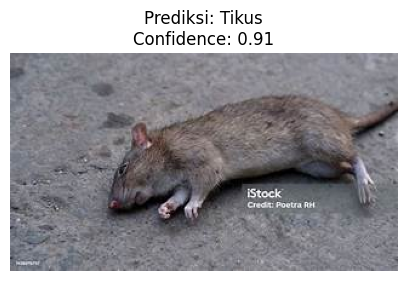

File: werok.jpg
Prediksi: Tikus (Confidence: 0.91)


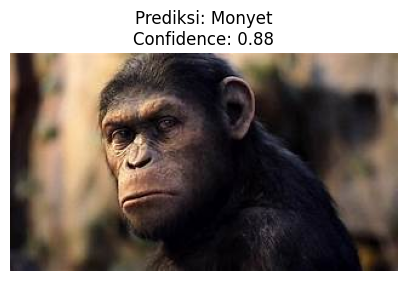

File: apes.jpg
Prediksi: Monyet (Confidence: 0.88)


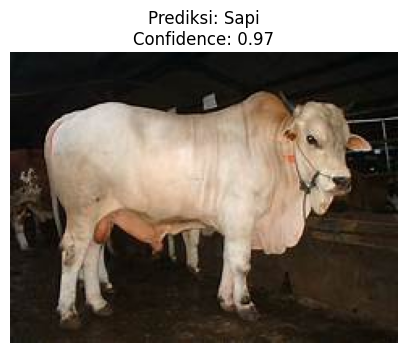

File: th.jpg
Prediksi: Sapi (Confidence: 0.97)


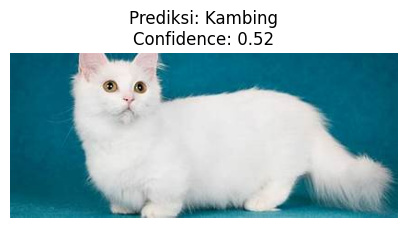

File: kucingg.jpg
Prediksi: Kambing (Confidence: 0.52)


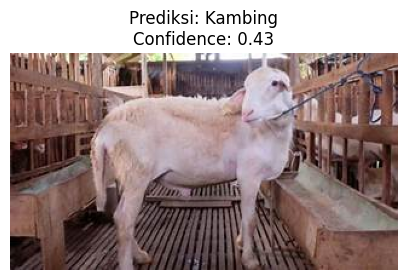

File: wedus.jpg
Prediksi: Kambing (Confidence: 0.43)


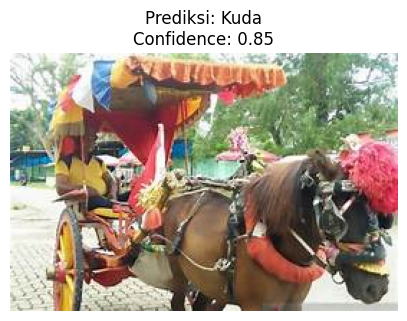

File: jaran.jpg
Prediksi: Kuda (Confidence: 0.85)


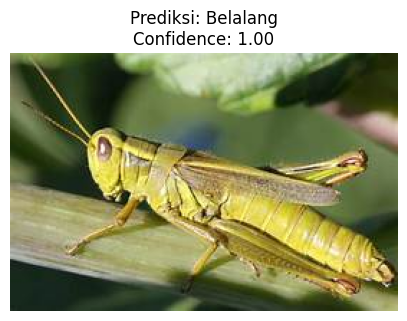

File: hopper.jpg
Prediksi: Belalang (Confidence: 1.00)


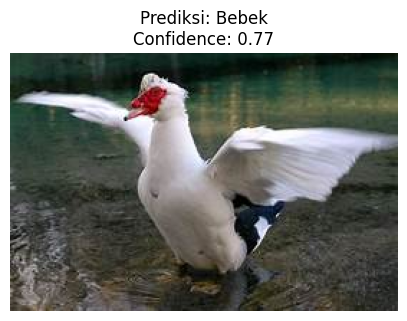

File: duck.jpg
Prediksi: Bebek (Confidence: 0.77)


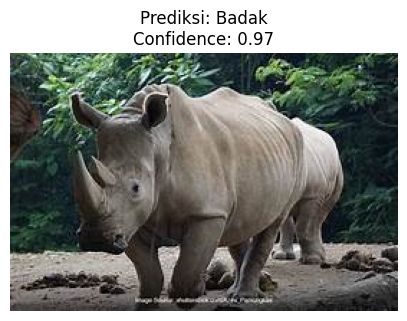

File: badak.jpg
Prediksi: Badak (Confidence: 0.97)


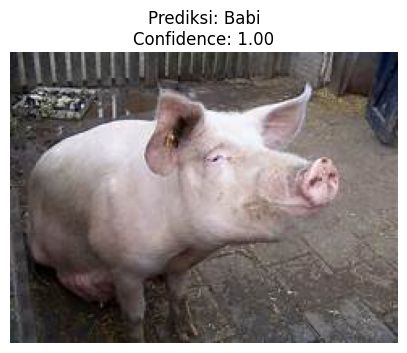

File: babi.jpg
Prediksi: Babi (Confidence: 1.00)


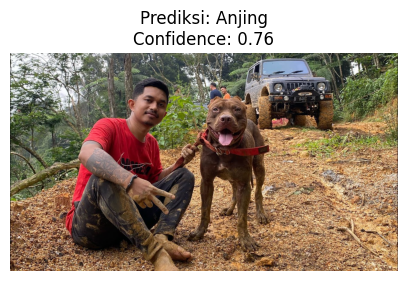

File: Anjing.jpg
Prediksi: Anjing (Confidence: 0.76)


In [13]:
# Unggah gambar untuk pengujian
print("Silakan upload gambar yang ingin diuji:")
uploaded = files.upload()

for image_name in uploaded.keys():
    # Simpan gambar yang diupload ke file sementara
    image_path = f"/content/{image_name}"
    with open(image_path, "wb") as f:
        f.write(uploaded[image_name])

    # Melakukan prediksi
    predicted_label, confidence, predictions = predict_with_tflite(
        model_path, image_path, labels=labels
    )

    # Menampilkan gambar dan hasil prediksi
    img = load_img(image_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_label}\nConfidence: {confidence:.2f}")
    plt.show()

    print(f"File: {image_name}")
    print(f"Prediksi: {predicted_label} (Confidence: {confidence:.2f})")
